In [1]:
import pandas as pandas
import matplotlib.pyplot as plot
import numpy as numpy
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import re
import string
import cv2
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Flatten
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Bidirectional
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, GlobalMaxPooling1D, MaxPool2D, SimpleRNN, Flatten, BatchNormalization, Conv2D
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Завдання 2
classes = ['human','cats','horses']
classes_arr = []
image_arr = []
image_name = []
class_id = 0
for folder in classes:
    for imagename in os.listdir(folder):
        image_sample = load_img(os.path.join(folder,imagename),target_size=(50,50))
        image_sample = img_to_array(image_sample)
        image_arr.append(image_sample)
        classes_arr.append(class_id)
        image_name.append(imagename)
    class_id+=1  
image_arr = numpy.array(image_arr)    
image_arr.shape
image_arr /= 255
image_arr[0]            
image_data = {"class": classes_arr, "array": image_name}
image_data = pandas.DataFrame(image_data)
image_data


,class,array
0,0,rider-46.jpg
1,0,rider-189.jpg
2,0,rider-74.jpg
3,0,rider-149.jpg
4,0,rider-52.jpg
...,...,...
601,2,horse-136.jpg
602,2,horse-52.jpg
603,2,horse-54.jpg
604,2,horse-78.jpg


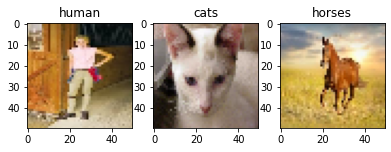

In [3]:
figure = plot.figure(figsize=(20,20))
for i in range(3):
    figures = figure.add_subplot(1,9,i+1)
    figures.set_title(classes[i])
    image = array_to_img(image_arr[204*i])
    plot.imshow(image)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(image_arr, image_data['class'], test_size=0.30)
Y_train = numpy.asarray(Y_train).astype(numpy.int32)
Y_test = numpy.asarray(Y_test).astype(numpy.int32)
Y_train = tf.one_hot(Y_train, 4)
Y_test = tf.one_hot(Y_test, 4)
#model building
alpha = 0.02
model = keras.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(50,50,3)))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.Dense(4, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 50, 50, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 25, 25, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                    

In [5]:
model.fit(X_train, Y_train, epochs=5, validation_split=0.2, verbose = 1)

Epoch 1/5
11/11 [==============================] - 46s 4s/step - loss: 1.1631 - accuracy: 0.3156 - val_loss: 1.0255 - val_accuracy: 0.4706
Epoch 2/5
11/11 [==============================] - 1s 53ms/step - loss: 0.9600 - accuracy: 0.5811 - val_loss: 0.9278 - val_accuracy: 0.5176
Epoch 3/5
11/11 [==============================] - 1s 54ms/step - loss: 0.8597 - accuracy: 0.6106 - val_loss: 0.8305 - val_accuracy: 0.6118
Epoch 4/5
11/11 [==============================] - 0s 39ms/step - loss: 0.7390 - accuracy: 0.6785 - val_loss: 0.8325 - val_accuracy: 0.7294
Epoch 5/5
11/11 [==============================] - 0s 40ms/step - loss: 0.5789 - accuracy: 0.7699 - val_loss: 0.5773 - val_accuracy: 0.7529


In [7]:
score = model.evaluate(X_train, Y_train, verbose=0) 
print('Test accuracy:', score[1])
print('Test score:', score[0]) 

Test accuracy: 0.8372641801834106
Test score: 0.48300087451934814
